In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pprint import pprint


warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 700)


TRAIN_DATA_PATH = "data/train.csv"
TEST_DATA_PATH = "data/test.csv"


### Visualization utils




In [90]:


def plot_missing_values(df, title="Missing Values in Data", colormap="magma"):
    missing_percentage = df.isnull().mean() * 100
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette=colormap)
    
    plt.xlabel('Missing Values % ', fontsize=14)
    plt.ylabel('Column', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(np.linspace(0, 50, 10 + 1))
    
    for i, percentage in enumerate(missing_percentage.values):
        plt.text(percentage + 0.5, i, f'{percentage:.2f}%', fontsize=12, va='center')
    
    plt.show()
    
    
def plot_column_counts(df, column_name, title, display_k=10, colormap="viridis"):
    '''
    Function to display bar plots of counts of a column in a DataFrame
    
    Inputs:
        df: DataFrame
            The DataFrame containing the data
        column_name: str
            Name of the column to plot
        display_k: int, default=10
            Number of top values to plot
    '''
    column_counts = df[column_name].value_counts()[:display_k]
    
    # Plot the bar plot using Seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(x=column_counts.values, y=column_counts.index, palette=colormap,)
    
    plt.xlabel('Counts', fontsize=16)
    plt.ylabel(column_name, fontsize=13)
    plt.yticks(fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()
    


In [91]:
train_df = pd.read_csv(TRAIN_DATA_PATH)
test_df = pd.read_csv(TEST_DATA_PATH)

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [93]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [94]:
train_df.head(3)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [95]:
test_df.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


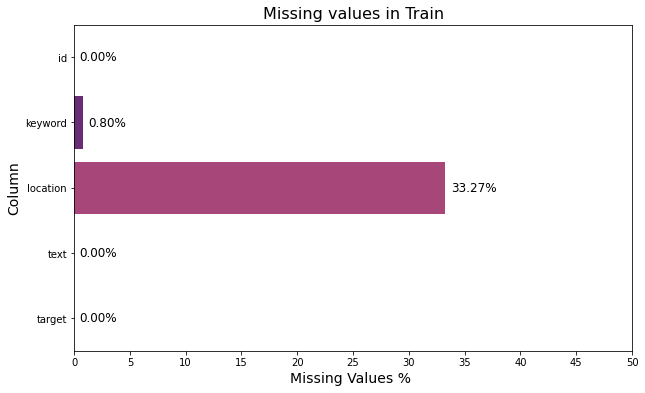

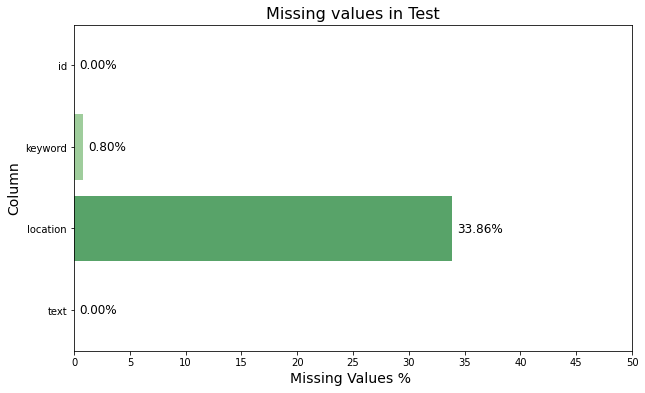

In [96]:
plot_missing_values(train_df, "Missing values in Train")
plot_missing_values(test_df, "Missing values in Test", colormap="Greens")

### Location analysis

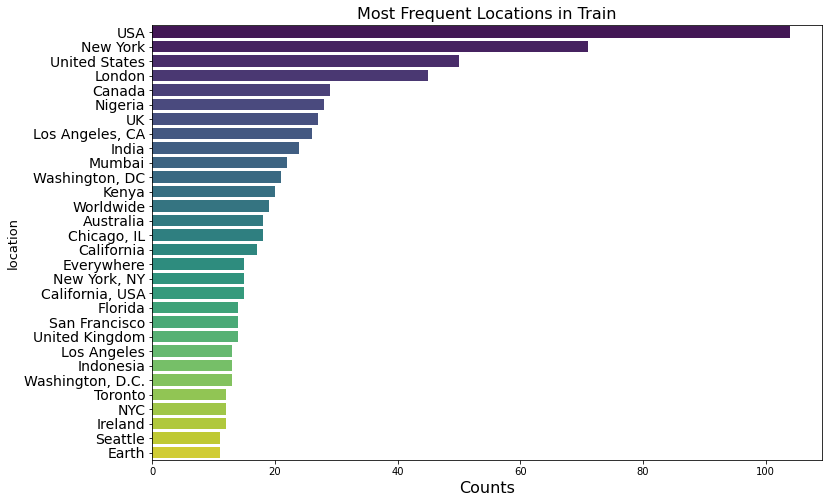

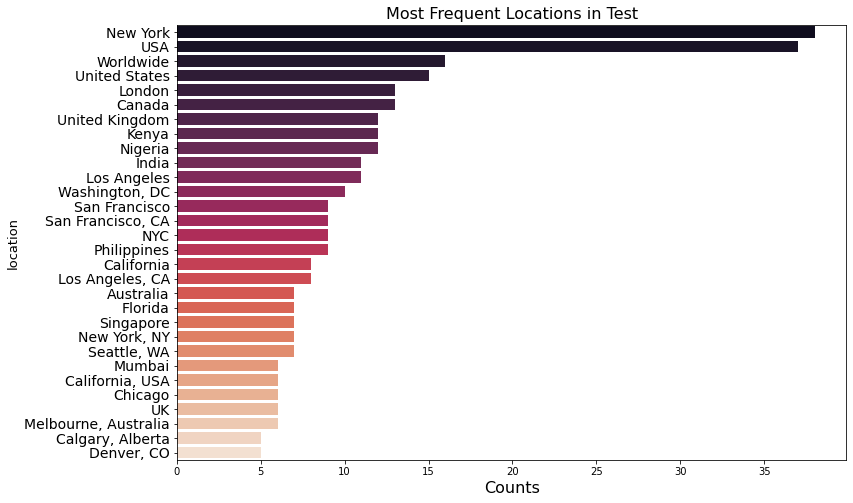

In [100]:
plot_column_counts(train_df, column_name="location",
                   title="Most Frequent Locations in Train",
                   display_k=30,
                   colormap="viridis")


plot_column_counts(test_df, column_name="location",
                   title="Most Frequent Locations in Test",
                   display_k=30,
                   colormap="rocket")


In [105]:
train_df["location"].value_counts()[-20:]

Paulton, England                  1
Johannesburg                      1
Alvin, TX                         1
Wilbraham, MA                     1
Jerseyville, IL                   1
The Citadel, Oldtown, Westeros    1
Trackside California              1
he/him or she/her (ask)           1
Some pum pum                      1
SEA Server                        1
Waco, Texas                       1
todaysbigstock.com                1
buenos aires argentina            1
everydaynigerian@gmail.com        1
Surulere Lagos,Home Of Swagg      1
MontrÌ©al, QuÌ©bec                1
Montreal                          1
ÌÏT: 6.4682,3.18287               1
Live4Heed??                       1
Lincoln                           1
Name: location, dtype: int64

In [106]:
test_df["location"].value_counts()[-20:]

Raleigh                           1
norton                            1
Dunedin, New Zealand              1
@ArgentinaLiars ?| willbradley    1
Virginia                          1
festac,Lagos,Nigeria              1
At Grandmother Willow's           1
|Elsmere| Wilmington, DE.         1
Curitiba-PR                       1
globetrotter                      1
Roanoke, VA                       1
Between Manchester and Lille.     1
Phoenix, AZ                       1
Subconscious LA                   1
#Global                           1
Medford, NJ                       1
Quezon City                       1
LanÌ¼s                            1
USA,Washington,Seattle            1
Brussels, Belgium                 1
Name: location, dtype: int64

    Observations:
        1) Location columns has about 33% values missing which is quite high rate of NAN's values
        
        2) Values are not in the same granularity level. We have cities, countries, country + city pairs and different tags. This means, that this columns is hard to parse, encode and process as we don't have a clear 
        interpretation what location means. It could be anything from country to email (as you can see above).
        
        3) Least common locations are weird and not interpretable. We can see emails, incorrect spelling and just some garbage in values
        
Overall, I would say, that I will drop this feature for now since it seems to be unpromissing because of quality and consistency of values in location column.
     